In [0]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
print(tf.__version__) # melihat versi dari tensotflow

2.2.0


In [0]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-17 08:09:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  11.7MB/s    in 39s     

2020-05-17 08:09:51 (7.95 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
# mengekstrak dataset yang sudah di upload
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
# mengatur directory untuk training dan validation
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

train_paper_dir = os.path.join(base_dir + 'paper')
train_rock_dir = os.path.join(base_dir + 'rock')
train_scissors_dir = os.path.join(base_dir + 'scissors')



In [0]:
# membuat class callback
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.97):
            print()
            print("YEAY! Accuracy has reached 97%")
            self.model.stop_training = True


callbacks = callBack()

In [0]:
# membuat model untuk klasifikasi
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), # merubah matriks 2 dimensi menjadi 1 dimensi agar dapat di proses di MLP / fully connected layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # menggunakan softmax karena digunakan untuk mengklasifikan lebih dari 2 kelas
])

# menampilkan parameter dari model yang dibuat
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 33, 64)        3

In [0]:
datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = datagenerator.flow_from_directory(
        base_dir, # direktori dari data latih
        target_size=(200, 300),  # mengubah resolusi seluruh gambar dari dataset menjadi 150x150 piksel
        batch_size=128,
        # karena kita merupakan masalah klasifikasi > 2 kelas maka menggunakan class_mode = 'categorical'
        subset = 'training',
        class_mode='categorical')
 
validation_generator = datagenerator.flow_from_directory(
        base_dir, # direktori dari data validasi
        target_size=(200, 300), # mengubah resolusi seluruh gambar dari dataset menjadi 150x150 piksel
        batch_size=32, # karena kita merupakan masalah klasifikasi > 2 kelas maka menggunakan class_mode = 'categorical' sumber : https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
        subset ='validation',
        class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adamax(),
              metrics=['accuracy'])

In [0]:
model_training = model.fit(
      train_generator,
      steps_per_epoch=15,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=10, #ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=15,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1,
      callbacks=[callbacks] )

print(model_training.epoch, model_training.history["accuracy"][-1]) # menampilkan jumlah epoch dan akurasi
print(model_training.history.keys()) # menampilkan parameter yang dihasilkan

Epoch 1/10
15/15 [==============================] - 105s 7s/step - loss: 1.0157 - accuracy: 0.5216 - val_loss: 0.7195 - val_accuracy: 0.7804
Epoch 2/10
15/15 [==============================] - 103s 7s/step - loss: 0.5892 - accuracy: 0.8015 - val_loss: 0.4310 - val_accuracy: 0.8443
Epoch 3/10
15/15 [==============================] - 103s 7s/step - loss: 0.3683 - accuracy: 0.8749 - val_loss: 0.2693 - val_accuracy: 0.9147
Epoch 4/10
15/15 [==============================] - 104s 7s/step - loss: 0.2276 - accuracy: 0.9308 - val_loss: 0.1572 - val_accuracy: 0.9510
Epoch 5/10
15/15 [==============================] - 104s 7s/step - loss: 0.1410 - accuracy: 0.9558 - val_loss: 0.1604 - val_accuracy: 0.9424
Epoch 6/10
15/15 [==============================] - 103s 7s/step - loss: 0.1291 - accuracy: 0.9537 - val_loss: 0.1188 - val_accuracy: 0.9574
Epoch 7/10
15/15 [==============================] - ETA: 0s - loss: 0.0848 - accuracy: 0.9761
YEAY! Accuracy has reached 97%
15/15 [======================

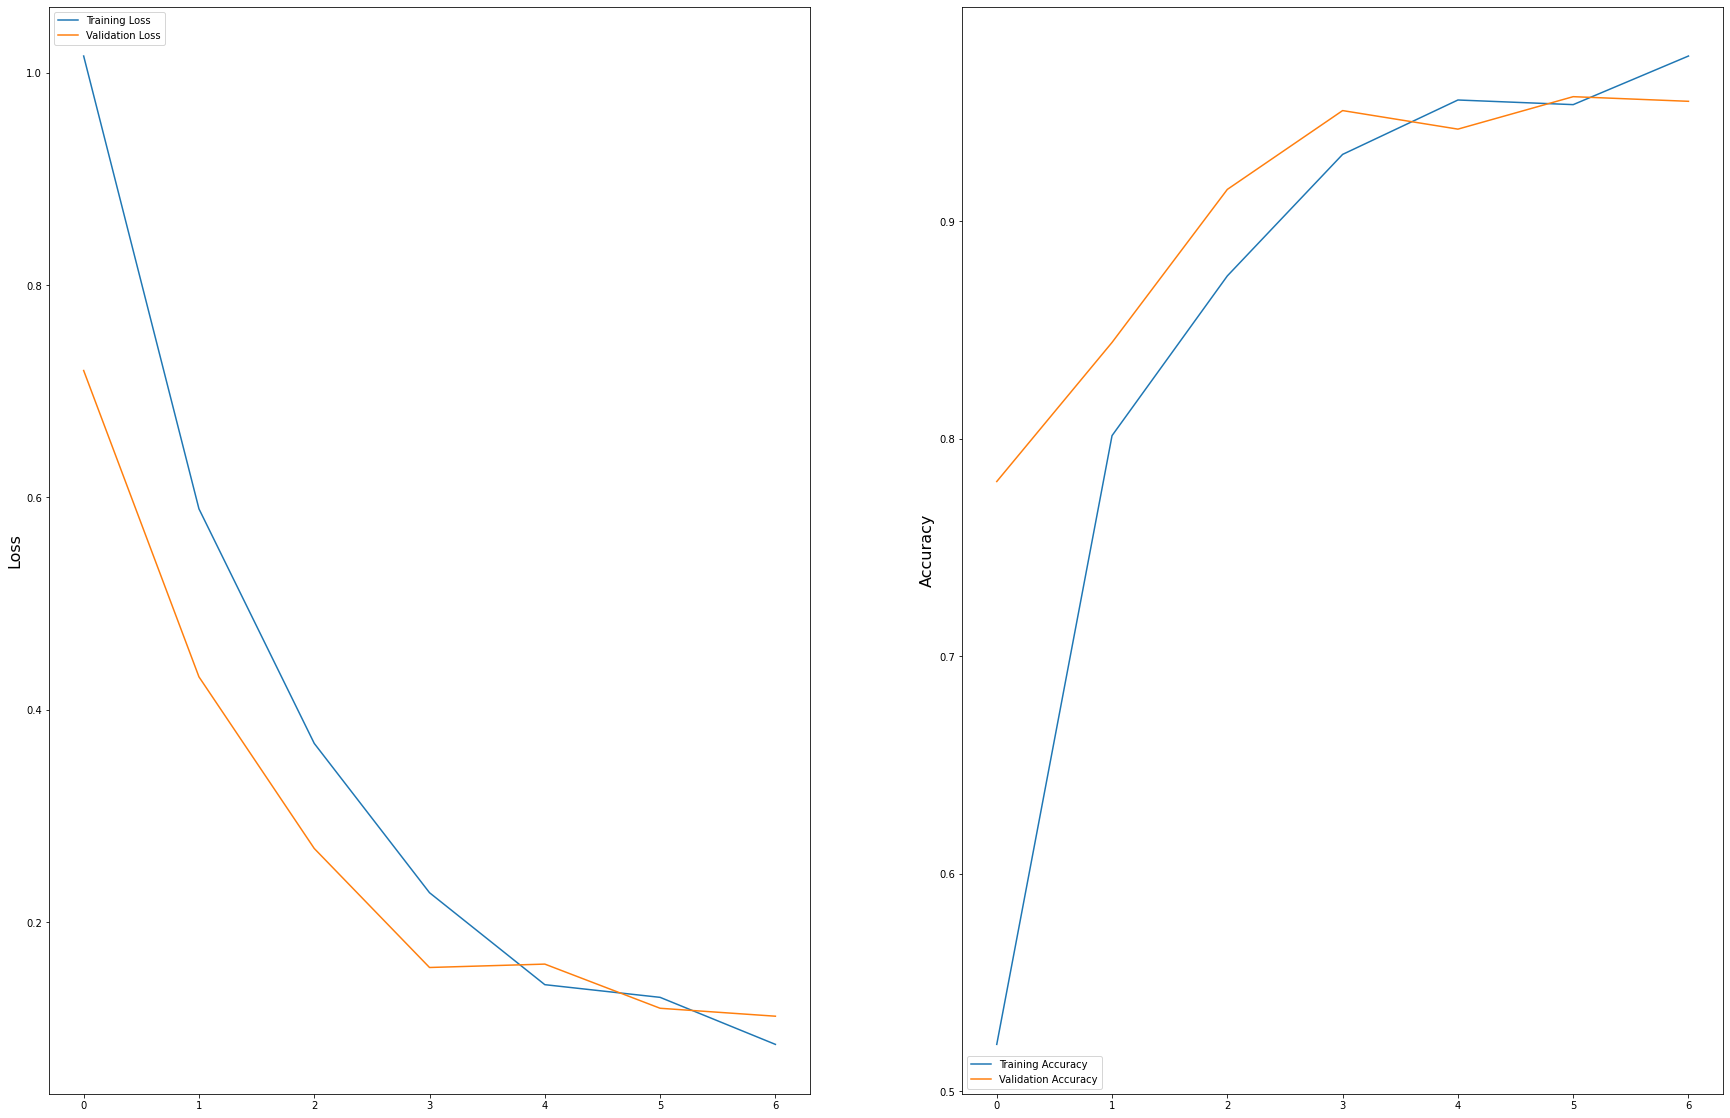

In [0]:
# membuat grafik dari training dan validasi
plt.figure(figsize=(30,20))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_training.history['loss'], label='Training Loss')
plt.plot(model_training.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_training.history['accuracy'], label='Training Accuracy')
plt.plot(model_training.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower left')
plt.show()

Saving 1MMkSW3f1CAsw03q.png to 1MMkSW3f1CAsw03q.png
[[0. 0. 1.]]
scissors


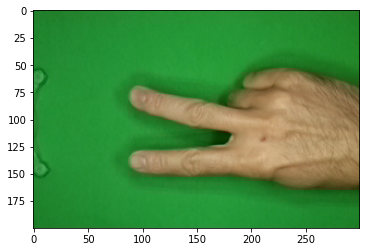

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  classes = classes.tolist()
  if classes == [[0, 1, 0]]:   
      print('rock')
  elif classes == [[1, 0, 0]]:
      print('paper')
  elif classes == [[0, 0, 1]]:
      print('scissors')
  else:
      print("Unrecognized")